Title: Train a Linear Regression Model

Task 1: Predicting House Prices<br>
Dataset: Use a dataset that contains various features of houses such as square footage, number of bedrooms, and age of the house.

Mean Squared Error (MSE): 3056827777.96
R-squared (R²): 0.82


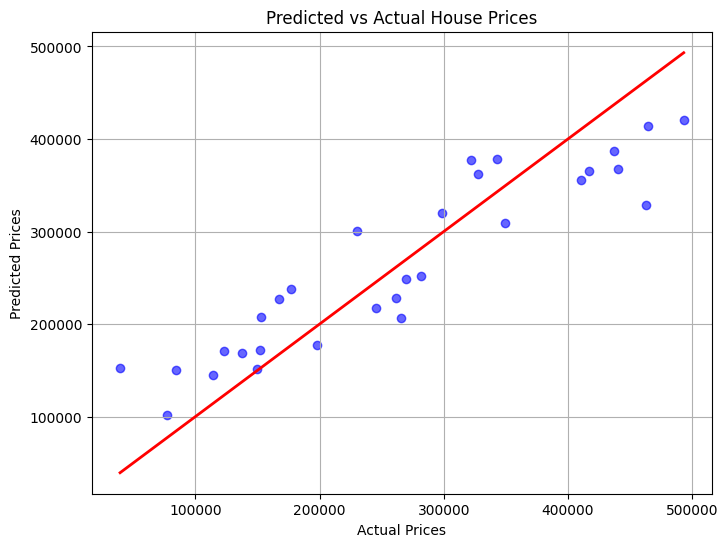

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a synthetic house dataset
np.random.seed(42)

# Features: square footage, number of bedrooms, and age of house
n_samples = 100
square_footage = np.random.randint(800, 4000, n_samples)  # between 800 and 4000 sq ft
bedrooms = np.random.randint(1, 6, n_samples)  # between 1 and 5 bedrooms
age_of_house = np.random.randint(0, 100, n_samples)  # between 0 and 100 years old

# Target: house price (based on the features)
price = (square_footage * 100) + (bedrooms * 5000) - (age_of_house * 100) + np.random.normal(0, 50000, n_samples)  # adding some noise

# Create a DataFrame
data = pd.DataFrame({
    'Square Footage': square_footage,
    'Number of Bedrooms': bedrooms,
    'Age of House': age_of_house,
    'House Price': price
})

# Step 2: Split the data into training and testing sets
X = data[['Square Footage', 'Number of Bedrooms', 'Age of House']]  # Features
y = data['House Price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Feature scaling (optional but recommended for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 7: Visualize the predicted vs actual prices (for better understanding)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # line for perfect prediction
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


Task 2: Predicting Car Mileage (MPG)<br>
Dataset: Use a dataset where features include horsepower, weight, and model year of cars.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset (replace with your actual loading method)
try:
    df = pd.read_csv('auto_mpg.csv') # Assuming you have a CSV file
except FileNotFoundError:
    import seaborn as sns
    df = sns.load_dataset('mpg')

# Handle potential missing values (example: drop rows with NaNs)
df.dropna(inplace=True)

# Separate features (X) and target (y)
X = df.drop('mpg', axis=1)
y = df['mpg']

# Identify numerical and categorical features
numerical_features = ['horsepower', 'weight', 'model_year', 'displacement', 'cylinders']
categorical_features = ['origin']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that first preprocesses the data and then trains a linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# You can further explore feature importance (for linear regression, look at coefficients)
# or try other models and hyperparameter tuning.

Task 3: Predicting Student's Scores'
Dataset: Use a dataset that contains study hours and corresponding student test scores.

Mean Squared Error (MSE): 5.68
R-squared (R²): 0.97


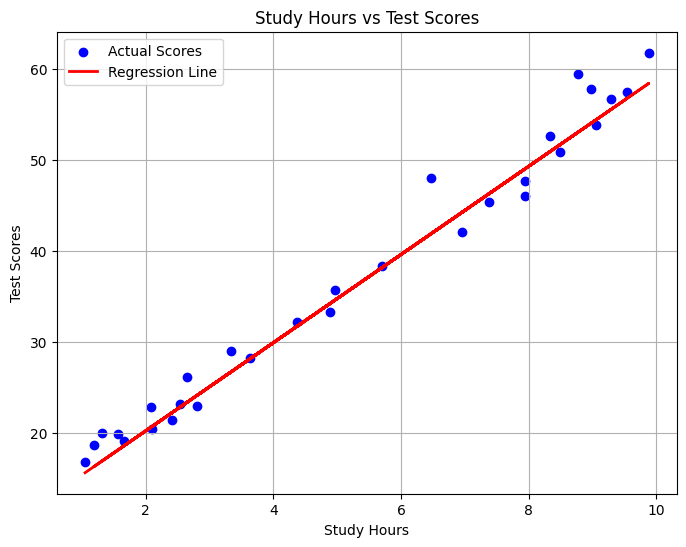

Model Coefficients: [4.84445966]
Model Intercept: 10.509242026333336


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a synthetic dataset
# Let's assume the data is about study hours and corresponding test scores
np.random.seed(42)

# Generate study hours (feature) and test scores (target)
study_hours = np.random.uniform(1, 10, 100)  # 100 random study hours between 1 and 10
test_scores = 10 + 5 * study_hours + np.random.normal(0, 3, 100)  # Test scores (with some random noise)

# Create a DataFrame
df = pd.DataFrame({'Study Hours': study_hours, 'Test Scores': test_scores})

# Step 2: Split the dataset into training and testing sets
X = df[['Study Hours']]  # Feature
y = df['Test Scores']    # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Visualize the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Study Hours vs Test Scores')
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Visualize the model coefficients
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
